In [2]:
import matplotlib.pyplot as plt
import preprocess as pp
import cv2
import numpy as np
import pandas as pd

(256, 2048)


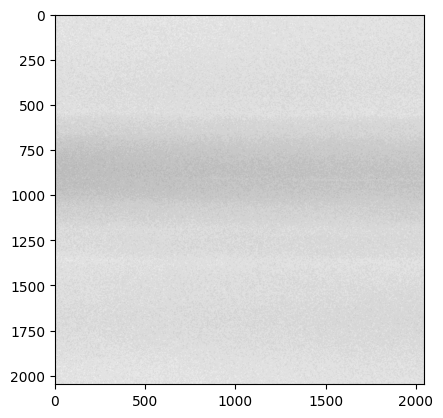

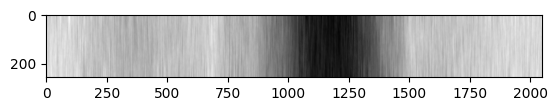

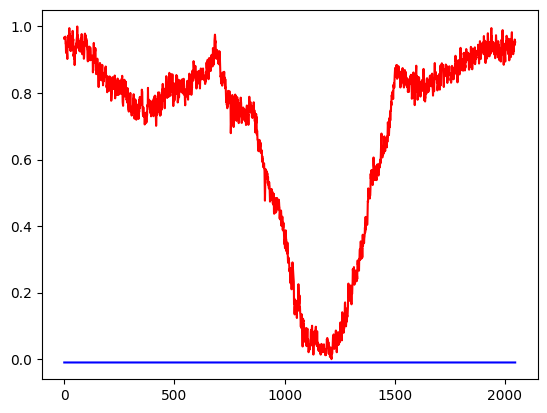

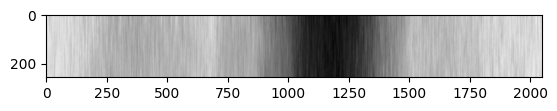

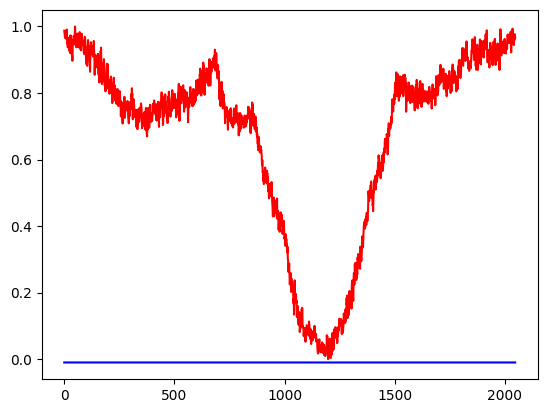

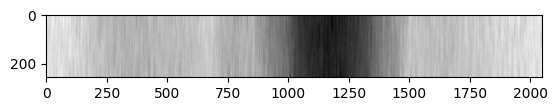

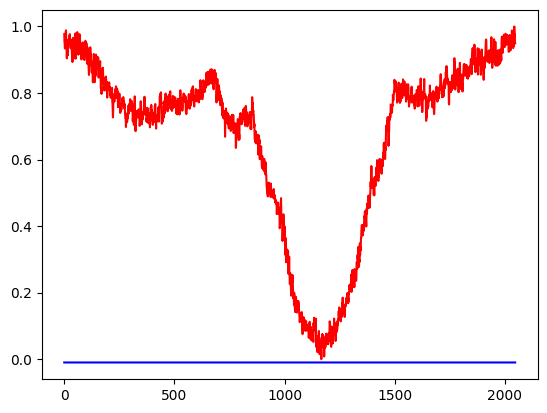

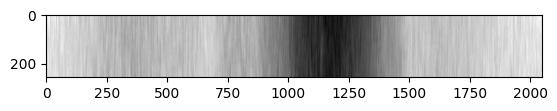

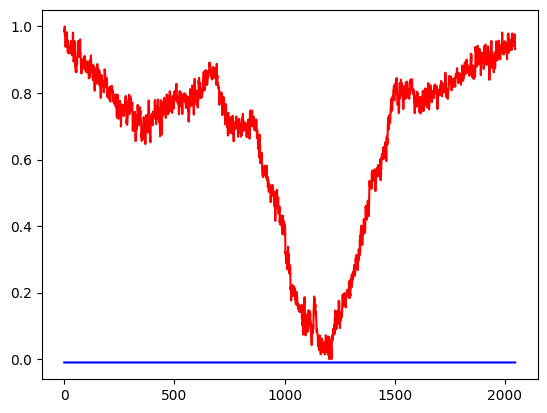

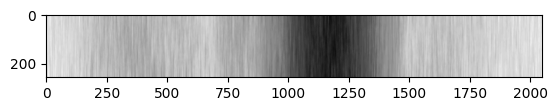

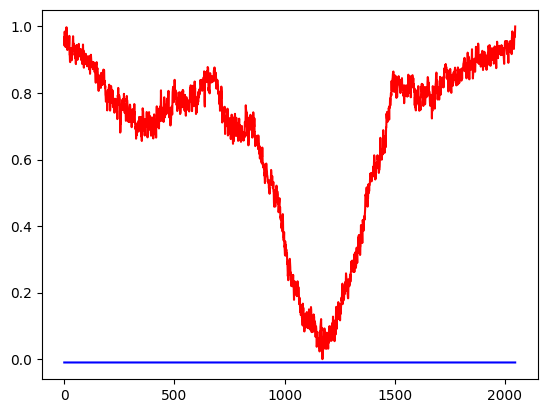

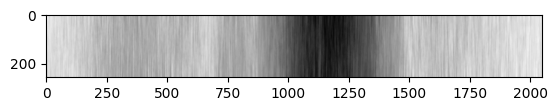

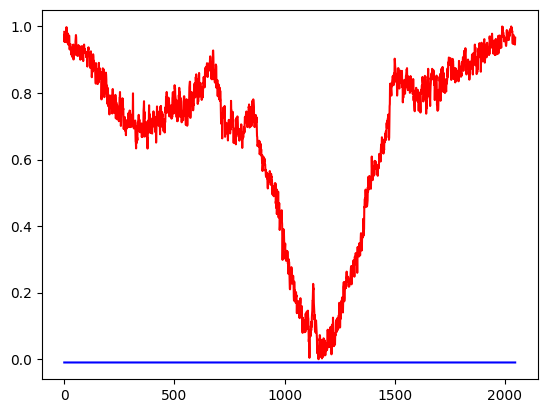

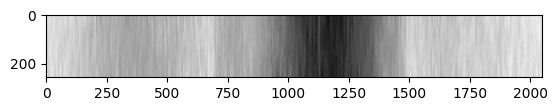

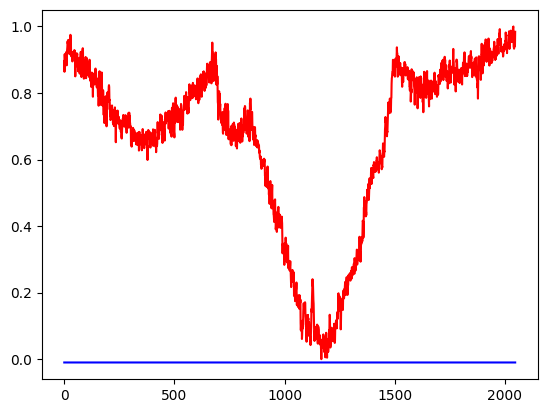

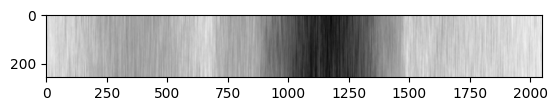

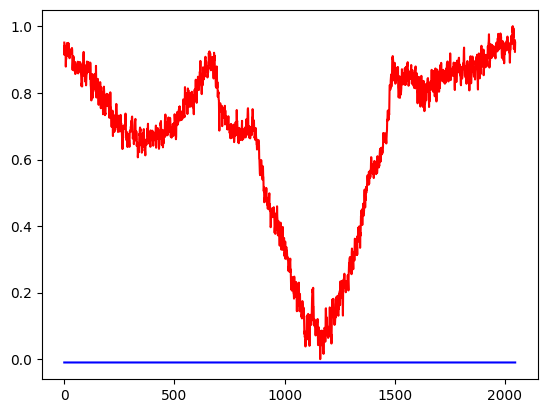

In [7]:

weld = pp.WeldImage("/home/VirtualFlaw/Data/Raw_jpg/REJ/22C042-06-008-1st-1-(2)-37-R-IP.jpg")
weld.image = weld.adjustBrightness()
weld.imshow_2D()
split_image = weld.splitImage(8)
print(split_image[0].shape)

for i in range(len(split_image)):
    split_image[i] = pp.motion_blur(split_image[i], 101, "vertical")
    
    
origin_images = split_image.copy()   
for i in range(len(split_image)):    
    split_image[i] = np.array(split_image[i], dtype=np.float32)

for i in range(len(split_image)):
    while split_image[i].shape[0] > 1:
        split_image[i] = np.split(split_image[i], 2, axis=0)[0] + np.split(split_image[i], 2, axis=0)[1]
    split_image[i] = np.squeeze(split_image[i])
    #min-max normalization
    split_image[i] = (split_image[i] - np.min(split_image[i])) / (np.max(split_image[i]) - np.min(split_image[i]))
    

for i in range(len(split_image)):
    
    
    """plt.imshow(origin_images[i], cmap="gray")
    plt.figure()"""
    plt.figure()
    plt.imshow(origin_images[i], cmap="gray")
    
    plt.figure()    
    plt.plot(split_image[i], color="red")
    plt.plot(np.arange(0, len(split_image[i])), np.ones(len(split_image[i])) * -0.01, color="blue")
